In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
words[:1]

['emma']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
b= {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [8]:
v = b.items()

In [9]:
sorted(v,key=lambda kv:kv[1],reverse=True)

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [10]:
import torch

In [11]:
N = torch.zeros((27,27),dtype = torch.int32)

In [12]:
N.dtype

torch.int32

In [13]:
chars = sorted(set(''.join(words)))

In [14]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [15]:
type(stoi)
type(itos)

dict

In [17]:
for w in words:
    char = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(char,char[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

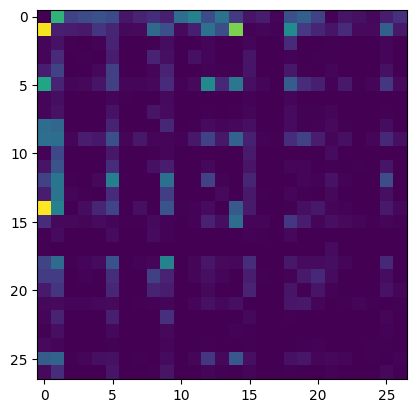

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [19]:
stoi.items()

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26), ('.', 0)])

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

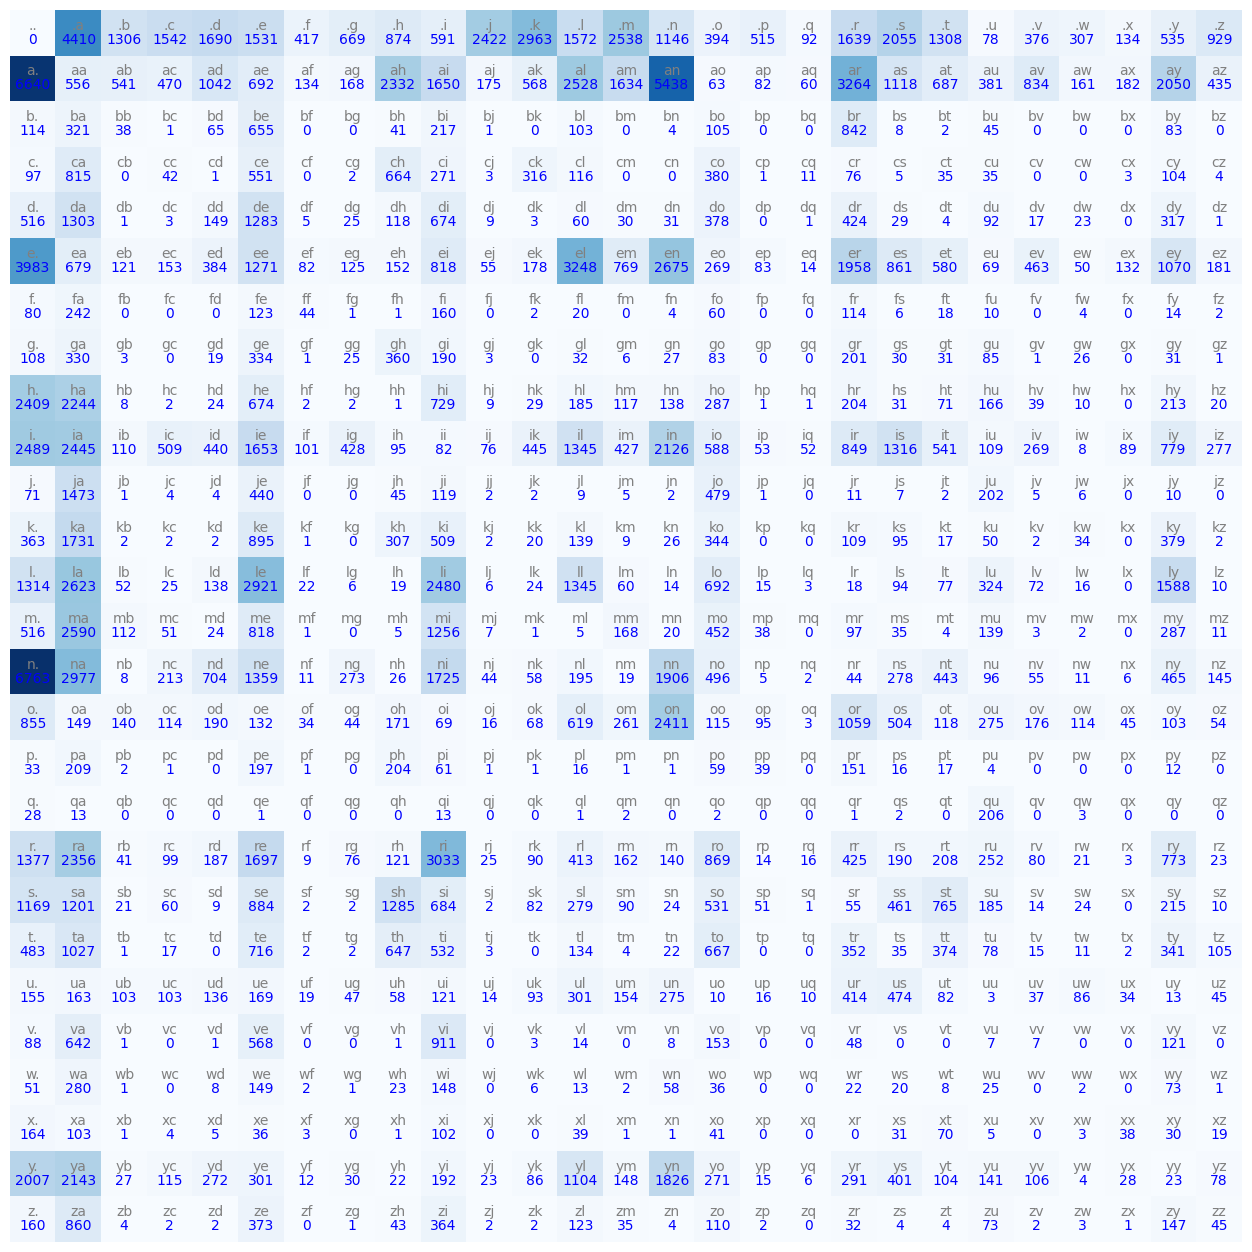

In [20]:
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color = 'gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='blue')
plt.axis('off')

In [21]:
P = N[0].float()

In [22]:
P = P/P.sum()

In [23]:
P.sum()

tensor(1.)

In [24]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [25]:
g = torch.Generator().manual_seed(2147483648)

for i in range (20):
    out = []
    ix=0
    while True:
        s = N[ix].float()
        P = s/s.sum()
        ix = torch.multinomial(P,num_samples=1,replacement=True,generator=g).item()
        str = itos[ix]
        out.append(str)
        if ix==0:
            break
    print(''.join(out))    

can.
ahior.
slea.
eman.
areiakialaveiphali.
usanari.
mosama.
cah.
cyl.
ah.
delarydn.
ed.
etus.
a.
eloue.
ahiylejon.
xxikon.
xfoshonis.
ie.
kah.


In [26]:
P = (N+1).float()
P /= P.sum(1,keepdim=True)

In [27]:
g = torch.Generator().manual_seed(2147483648)

for i in range (5):
    out = []
    ix=0
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        str = itos[ix]
        out.append(str)
        if ix==0:
            break
    print(''.join(out)) 

can.
ahior.
slea.
eman.
areiakialaveiphali.


In [28]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [29]:
log_likelihood = 0.0
n=0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(w,w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_likelihood += torch.log(prob)
        n += 1

print(f"{log_likelihood=}")
nll = -(log_likelihood)
print(f"{nll=}")
print(f"{nll/n=}")


log_likelihood=tensor(-412482.3750)
nll=tensor(412482.3750)
nll/n=tensor(2.5139)


In [30]:
#Part 2: Alternative approach to create character level sequence model using neural network

In [31]:
# Create training set of bigrams (x,y)
xs, ys =[], []
for w in words[:1]:
    char = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(char,char[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [32]:
xs

tensor([ 0,  5, 13, 13,  1])

In [33]:
ys

tensor([ 5, 13, 13,  1,  0])

In [34]:
import torch.nn.functional as F

In [35]:
# Randomly initialize the weights of the neurons. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g) # 27 neurons weight

In [36]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the neural network : one-hot encoding
# The output of these 27 neurons are treated as log counts therefore we need to exponentiate these numbers in order to get the occurence of each character
logits = (xenc @ W) # predict log-counts - This tells the firing rate of 27 neurons for each input
counts = logits.exp() # equivalent N 
prob = counts / counts.sum(1, keepdims=True) # normalize the counts of the rows to get the probabilities of the getting the next character in the sequence
# The last two lines are called as 'softmax'

In [37]:
# 5,27
# 27,27
# (5,27) @ (27,27) = (5,27)

In [38]:
prob.shape

torch.Size([5, 27])

In [39]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print(f'input to the neural network:{x}')
    print('output probabilities from the neural net:', prob[i])
    print('label assigned to the next character',y)
    p = prob[i,y]
    print('probability assigned to the next character',p)
    logp= torch.log(p)
    print('the loglikelihood:',logp.item())
    nll = -logp
    print('the negative log likelihood',nll.item())
    nlls[i] = nll

print('================')
print('average negative log likelihood:', nlls.mean().item())


--------------
bigram example 1: .e (indexes 0,5)
input to the neural network:0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label assigned to the next character 5
probability assigned to the next character tensor(0.0123)
the loglikelihood: -4.399273872375488
the negative log likelihood 4.399273872375488
--------------
bigram example 2: em (indexes 5,13)
input to the neural network:5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label assigned to the next character 13
probability assigned to the next character tensor(0.

In [40]:
# --------Gradient based Optimization----------------------

In [69]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'- Randomly initialize the weights of the neurons. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [71]:
for k in range(100):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the neural network : one-hot encoding
    # The output of these 27 neurons are treated as log counts therefore we need to exponentiate these numbers in order to get the occurence of each character
    logits = (xenc @ W) # predict log-counts - This tells the firing rate of 27 neurons for each input
    counts = logits.exp() # equivalent N 
    prob = counts / counts.sum(1, keepdims=True) # normalize the counts of the rows to get the probabilities of the getting the next character in the sequence
    # The last two lines are called as 'softmax'
    loss = -prob[torch.arange(num),ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    #backward pass
    W.grad= None #same as gradient as 0 or lack of gradient
    loss.backward()

    #update weights in order to minimize the loss by going against the opposite direction of gradient
    W.data += -50 * W.grad # every element of W.grad is telling us the influence of that weight on loss function

2.4899587631225586
2.4897916316986084
2.489628314971924
2.489469289779663
2.489313840866089
2.4891626834869385
2.4890148639678955
2.48887038230896
2.48872971534729
2.4885923862457275
2.4884581565856934
2.4883270263671875
2.488198757171631
2.4880735874176025
2.4879510402679443
2.4878313541412354
2.487715005874634
2.487600564956665
2.4874892234802246
2.487379550933838
2.4872729778289795
2.487168312072754
2.4870662689208984
2.486966133117676
2.486868381500244
2.4867727756500244
2.4866788387298584
2.4865872859954834
2.486497640609741
2.4864096641540527
2.4863228797912598
2.486238718032837
2.4861562252044678
2.4860754013061523
2.4859957695007324
2.4859180450439453
2.485841751098633
2.485767364501953
2.4856936931610107
2.485621929168701
2.4855518341064453
2.4854824542999268
2.485414981842041
2.4853484630584717
2.485283374786377
2.4852192401885986
2.485156536102295
2.4850947856903076
2.485034465789795
2.484975576400757
2.484917163848877
2.4848599433898926
2.4848031997680664
2.484748601913452


In [72]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483648)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

can.
ahior.
slea.
eman.
areiakialaveiphali.


In [ ]:
#-------Trigram Model using Neural Network algorithm---------------

In [16]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1, ix2))  # input is a pair (bigram)
        ys.append(ix3)         # target is the next character
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.shape[0]
print('number of examples:', num)

number of examples: 196113


In [17]:
vocab_size = len(stoi)

In [18]:
import torch.nn.functional as F

In [19]:
# One-hot encode the bigram input
xenc = F.one_hot(xs, num_classes=vocab_size).float()
xenc = xenc.view(num,-1) #Flatten to (num, 2*vocab_size)

In [20]:
# Initialize the weight
g = torch.Generator().manual_seed(2147483648)
W = torch.randn((2*vocab_size,vocab_size), generator=g, requires_grad=True)

In [21]:
for k in range(100):
    # Forward pass
    logits = xenc @ W
    counts = logits.exp()
    prob = counts/ counts.sum(1,keepdim=True) # softmax
    loss = -prob[torch.arange(num),ys].log().mean() + 0.01 *(W**2).mean()
    print(loss.item())

    #Backward pass
    W.grad = None
    loss.backward()

    #Update weights
    W.data =+ -50 * W.grad  # Gradient descent

4.027791500091553
2.854213237762451
2.981189489364624
2.8429059982299805
2.9614522457122803
2.8505187034606934
2.958871603012085
2.854757070541382
2.958996534347534
2.857604742050171
2.959085702896118
2.8597571849823
2.958721160888672
2.86149001121521
2.958040714263916
2.862931728363037
2.957233428955078
2.8641510009765625
2.9564249515533447
2.8651890754699707
2.9556798934936523
2.866074323654175
2.955024003982544
2.866827964782715
2.954460859298706
2.867469072341919
2.9539847373962402
2.8680121898651123
2.9535858631134033
2.8684709072113037
2.9532530307769775
2.8688583374023438
2.952976942062378
2.8691837787628174
2.9527478218078613
2.869457244873047
2.9525580406188965
2.8696863651275635
2.952399969100952
2.869878053665161
2.9522688388824463
2.8700385093688965
2.9521608352661133
2.8701725006103516
2.952070951461792
2.870284080505371
2.951996088027954
2.8703768253326416
2.951934337615967
2.8704545497894287
2.951882839202881
2.8705191612243652
2.95184063911438
2.870573043823242
2.951806

In [22]:
g = torch.Generator().manual_seed(2147483648)

# Generate 5 words
for i in range(5):
    start = ['h', 'e']  # You can change this to any valid bigram
    out = start[:]

    # Initialize bigram indices
    ch1 = stoi[start[0]]
    ch2 = stoi[start[1]]

    while True:
        # Prepare input
        x = torch.tensor([[ch1, ch2]])
        xenc = F.one_hot(x, num_classes=vocab_size).float()
        xenc = xenc.view(1, -1)

        # Forward pass
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        # Sample next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        next_char = itos[ix]
        out.append(next_char)

        if next_char == '.':
            break

        # Update bigram
        ch1, ch2 = ch2, ix

    # Print the generated word (excluding the end token)
    print(''.join(out[:-1]))


hen
hepjxhhormslwa
heemkcnareiagialpvccpbjjr
heubxvcbvcbsklm
hejyrh


In [ ]:
g = torch.Generator().manual_seed(2147483648)

# Generate 5 words
for i in range(5):
    # Ask user for two starting characters
    start = input("Enter two starting characters (e.g., ab): ").strip().lower()
    if len(start) != 2 or any(ch not in stoi for ch in start):
        print("Invalid input. Please enter exactly two valid characters from the vocabulary.")
        continue

    out = list(start)
    ch1 = stoi[start[0]]
    ch2 = stoi[start[1]]

    while True:
        x = torch.tensor([[ch1, ch2]])
        xenc = F.one_hot(x, num_classes=vocab_size).float()
        xenc = xenc.view(1, -1)

        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        next_char = itos[ix]
        out.append(next_char)

        if next_char == '.':
            break

        ch1, ch2 = ch2, ix

    print('Generated word:', ''.join(out[:-1]))


Generated word: kin
Generated word: kopjxhhormslwa
Generated word: koemkcnareiagialpvccpbjjr
Generated word: koubxvcbvcbsklm
Generated word: mijyrh
